![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Tokenización de textos  

En este taller podrán poner en práctica sus conocimientos sobre preprocesamiento de texto (tokenización). El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos detección de toxicidad en comentarios

En este taller se usará el conjunto de datos de detección de toxicidad en comentarios de la base de datos de Kaggle. Cada observación es un comentario que tiene como variable objetivo (target) la probabilidad de ser un comentario tóxico. El objetivo es predecir la toxicidad de cada comentario. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification/data).

In [35]:
import warnings
warnings.filterwarnings('ignore')

In [36]:
# Importación librerías
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt

In [37]:
# Carga de datos de archivos .csv
df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/Toxicity.zip')
df = df[['id','comment_text', 'target']]
df.head()

,id,comment_text,target
0,6101457,What are you talking about? What group do Pete...,0.0
1,5342103,"NO!, Let him, we need a Conservative government.",0.0
2,743361,"Perhaps he took the ""power out of the Cardinal...",0.2
3,551008,"As always, yours is dripping with sarcasm, whi...",0.0
4,865998,The dirty little secret is that the price rang...,0.3


<AxesSubplot:>

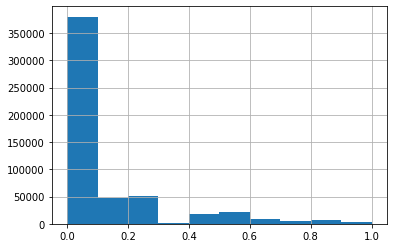

In [38]:
# Impresión histograma de variable de interés (y)
df.target.hist()

In [39]:
# Separación de variable de interés (y)
y = df.target
y.describe()

count    541462.000000
mean          0.102991
std           0.196979
min           0.000000
25%           0.000000
50%           0.000000
75%           0.166667
max           1.000000
Name: target, dtype: float64

In [40]:
# Separación de variables predictoras (X), solo se considera el texto de la noticia
X = df.comment_text

In [41]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Punto 1 - Tokenización con CountVectorizer

En la celda 1 creen y entrenen el modelo de regresión de su preferencia, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [42]:
# Celda 1
vect1 = CountVectorizer(lowercase=False)
Xtr_vec_1 = vect1.fit_transform(X_train)
Xte_vec_1 = vect1.transform(X_test)

In [46]:
regRF = RandomForestRegressor(max_depth = 17, max_features = 4, min_samples_leaf=5, n_jobs=-1).fit(Xtr_vec_1, y_train)
ypredTrRF = regRF.predict(Xtr_vec_1)
ypredRF = regRF.predict(Xte_vec_1)

In [47]:
mseTr1 = mse(ypredTrRF, y_train)
mseTr1

0.03868406134102928

In [48]:
mse1 = mse(ypredRF, y_test)
mse1

0.03903216112119897

## Punto 2 - Tokenización con CountVectorizer y trigramas

En la celda 2 creen y entrenen el mismo modelo de regresión del punto anterior (es decir si usaron un RandomForestRegresor usen nuevamente ese regresor), para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer **considerando trigramas** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [49]:
# Celda 2
vect3 = CountVectorizer(lowercase=False, ngram_range=(3, 3))
Xtr_vec_3 = vect3.fit_transform(X_train)
Xte_vec_3 = vect3.transform(X_test)

In [50]:
regRF3 = RandomForestRegressor(max_depth = 17, max_features = 4, min_samples_leaf=5, n_jobs=-1).fit(Xtr_vec_3, y_train)
ypredTrRF3 = regRF3.predict(Xtr_vec_3)
ypredRF3 = regRF3.predict(Xte_vec_3)

In [51]:
mseTr3 = mse(ypredTrRF3, y_train)
mseTr3

0.03868588895081745

In [52]:
mse3 = mse(ypredRF3, y_test)
mse3

0.03903357183031168

## Punto 3 - TfidfVectorizer

Investigen sobre la función TfidfVectorizer. En la celda de texto 3, expliquen en qué consiste esta técnica de tokenización (describanla y expliquen su funcionamiento) y cúales son las ventajas o deventajas de su uso al compararlo con la función CountVectorizer.

#Celda 3
### ¿En qué consiste la técnica de TfidfVectorizer?
TfidfVectorizer es una técnica que calcula la frecuencia de cada palabra (tokens individuales) en un documento (CountVectorizer), y adicionalmente, tiene en cuenta la frecuencia con la que aparece la palabra dentro de una colección de documentos (corpus).

TfidfVectorizer funciona construyendo primero un vocabulario de todas las palabras únicas en el corpus y luego calculando el puntaje TF-IDF para cada palabra en cada documento. 

Por lo tanto, CountVectorizer y TfidfVectorizer tienen la limitación de  manejar palabras fuera del vocabulario. Si una palabra aparece en un documento de prueba, pero no en el corpus de entrenamiento, se tratará como una palabra nueva y no tendrá un peso predefinido. Esto puede conducir a resultados inexactos si el documento de prueba contiene muchas palabras nuevas o raras.

TfidfVectorizer calcula la puntuación TF-IDF para cada palabra en cada documento del corpus utilizando la siguiente fórmula: TF-IDF (palabra, documento) = Frecuencia del término (palabra, documento) * Frecuencia inversa del documento (palabra), donde: 

- Frecuencia del término (palabra, documento) TF es la frecuencia de la palabra en el documento, calculada como el número de veces que aparece la palabra en el documento dividido por el número total de palabras en el documento. 
- Frecuencia inversa del documento (palabra) IDF es una medida de la frecuencia con la que aparece la palabra en todos los documentos del corpus, calculada como el logaritmo del número total de documentos del corpus dividido por el número de documentos que contienen la palabra. 


####                                                                                  TF­IDF=TF*IDF

Donde:

#### TF=(Numero de veces que una palabra aparece en el documento)/(Numero total de palabras en el documento)

#### IDF=log((Numero de documentos en el Corpus)/(Numero de documentos en el Corpus que contienen la palabra))

Existen algunos enfoques diferentes para calcular la puntuación IDF. El logaritmo de base 10 se usa a menudo en el cálculo. Sin embargo, algunas bibliotecas usan un logaritmo natural. Además, se puede agregar uno al denominador de la siguiente manera para evitar la división por cero.

#### IDF=log((Numero de documentos en el Corpus)/(Numero de documentos en el Corpus que contienen la palabra+1))

La puntuación TF-IDF refleja la importancia de una palabra para un documento en particular en relación con su importancia en todo el corpus. Las palabras que son comunes en un documento en particular, pero raras en todo el corpus recibirán una puntuación TF-IDF alta y se considerarán más importantes para distinguir entre diferentes documentos. 

TfidfVectorizer implementa este cálculo de una manera simple y eficiente, primero creando un vocabulario de todas las palabras únicas en el corpus y luego calculando el puntaje TF-IDF para cada palabra en cada documento usando la fórmula anterior. La matriz resultante representa la puntuación TF-IDF de cada palabra en cada documento.

En otras palabras, es una herramienta que convierte datos de texto en un formato numérico que puede usarse para modelos de aprendizaje automático para varias tareas de Procesamiento de Lenguaje Natural (NLP).


### Ventajas y desventajas frente a su uso al compararlo con la función CountVectorize

CountVectorizer cuenta la frecuencia de cada palabra en un documento. Esto puede ser útil cuando desea encontrar las palabras más comunes en un corpus o cuando desea clasificar documentos de texto según la frecuencia de ciertas palabras. Sin embargo, no tiene en cuenta el hecho de que algunas palabras pueden ser más importantes que otras para distinguir entre diferentes documentos.

Es importante mencionar que CountVectorizer trata todas las palabras por igual, independientemente de su importancia para distinguir entre diferentes documentos (corpus). Esto significa que a palabras comunes como “un / una”, "el / la" y "a" se les puede dar demasiado peso, mientras que, a palabras menos comunes, pero más importantes se les puede dar muy poco peso. Además, CountVectorizer no captura el contexto de las palabras.

Por su parte, TfidfVectorizer, calcula la "frecuencia de término-frecuencia de documento inversa" (TF-IDF) de cada palabra en un documento. Esto tiene en cuenta no solo la frecuencia con la que aparece una palabra en un documento, sino también la frecuencia con la que aparece en todos los documentos del corpus. Esto significa que las palabras que son comunes en todos los documentos tienen menos peso, mientras que las palabras que son raras en el corpus pero que aparecen con frecuencia en un documento específico tienen más peso. Esto puede ser útil en los casos en los que desea encontrar palabras que son específicas de ciertos documentos o cuando desea identificar palabras clave importantes para un documento determinado.


Sin embargo, TfidfVectorizer no considera el orden de las palabras en un documento. Esto significa que dos documentos con las mismas palabras en diferente orden pueden tener los mismos puntajes TF-IDF, aunque tengan diferentes significados. Además, TfidfVectorizer puede estar sesgado hacia documentos más largos, ya que tienden a tener más palabras y, por lo tanto, puntajes TF-IDF más altos. La Falta de comprensión semántica de CountVectorizer y de TfidfVectorizer puede conducir a resultados inexactos en ciertas tareas de PNL. Por ejemplo, las palabras con significados opuestos se tratan con la misma importancia en CountVectorizer y TfidfVectorizer.

Finalmente, ambas técnicas se basan únicamente en la frecuencia de las palabras dentro de un documento y no capturan el contexto en el que aparecen las palabras. Esto puede ser una limitación para ciertas tareas de PNL, como el análisis de sentimientos, donde el significado de las palabras puede depender del contexto en el que aparecen.

Referencias:

- Hakan Altınçay, Zafer Erenel, (2010). Analytical evaluation of term weighting schemes for text categorization, Pattern Recognition Letters, Volume 31, Issue 11, 2010, Pages 1310-1323, ISSN 0167-8655, https://doi.org/10.1016/j.patrec.2010.03.012.
    
- Li-Ping Jing, Hou-Kuan Huang and Hong-Bo Shi (2002). "Improved feature selection approach TFIDF in text mining," Proceedings. International Conference on Machine Learning and Cybernetics, Beijing, China, 2002, pp. 944-946 vol.2, doi: 10.1109/ICMLC.2002.1174522. 
    
- Mazyad, A., Teytaud, F., Fonlupt, C. (2018). A Comparative Study on Term Weighting Schemes for Text Classification. In: Nicosia, G., Pardalos, P., Giuffrida, G., Umeton, R. (eds) Machine Learning, Optimization, and Big Data. MOD 2017. Lecture Notes in Computer Science(), vol 10710. Springer, Cham. https://doi.org/10.1007/978-3-319-72926-8_9.

## Punto 4 - Tokenización con TfidfVectorizer

En la celda 4 creen y entrenen el mismo modelo de regresión del primer punto, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Procesen los comentarios con la función **TfidfVectorizer** y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [53]:
# Celda 4
vect4 = TfidfVectorizer(lowercase=False)
Xtr_vec_4 = vect4.fit_transform(X_train)
Xte_vec_4 = vect4.transform(X_test)

In [54]:
regRF4 = RandomForestRegressor(max_depth = 17, max_features = 4, min_samples_leaf=5, n_jobs=-1).fit(Xtr_vec_4, y_train)
ypredTrRF4 = regRF4.predict(Xtr_vec_4)
ypredRF4 = regRF4.predict(Xte_vec_4)

In [55]:
mseTr4 = mse(ypredTrRF4, y_train)
mseTr4

0.03867573612410257

In [56]:
mse4 = mse(ypredRF4, y_test)
mse4

0.039024590807875355

## Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos y comenten cómo el preprocesamiento de texto afecta el desempeño.

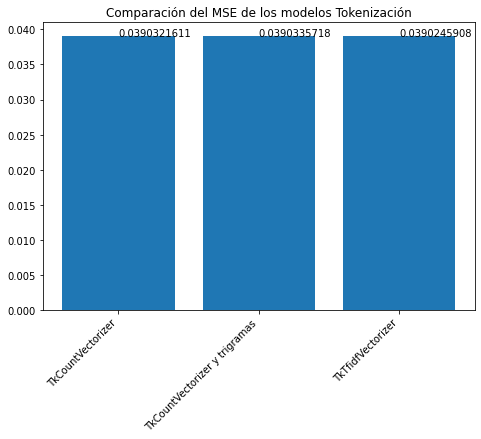

In [57]:
# Celda 5
fig = plt.figure()
ax = fig.add_axes([0.035,0.035,1,1])
ax.set_title("Comparación del MSE de los modelos Tokenización")
ejeX = ['TkCountVectorizer','TkCountVectorizer y trigramas', 'TkTfidfVectorizer']
ejeY = [round(mse1, 10), round(mse3, 10), round(mse4, 10)]
ax.bar(ejeX,ejeY)
fig.autofmt_xdate(rotation=45)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

- En el caso base (TkCountVectorizer) se utilizó para la tokenización la función CountVectorizer que convierte una colección de documentos de texto en una matriz de conteos de tokens, en este caso no se configuró el parámetro  "ngram_range", es decir la fragmentación del conjunto de palabras se realizó por unigramas, adicional a esto se configuró  el parámetro  lowercase=False, es decir se definió un caso de tokenización con limpieza de mayúsculas. Por último se definió utilizar el modelo de regresión RandomForest para la predicción de la probabilidad de la toxicidad  de los comentarios.  

- Al usar la tokenización con la fragmentación por unigramas se puede perder el contexto y la coherencia de las palabras, esto puede disminuir el desempeño del modelo. El resultado del MSE (Error Medio Cuadrático) para el caso base fue de 0.039032 el cual es muy cercano a los demás casos presentados  


- Para el caso 2 (TkCountVectorizer y trigramas) se realizó el mismo procedimiento del caso base pero en la tokenización se incluyó en la función CountVectorizer el parámetro "ngram_range=trigramas". En este caso la fragmentación considera conjuntos de tres palabras, lo que permite considerar el contexto de las palabras y una posible mejora del desempeño. Sin embargo, el MSE es muy similar 


- En el caso 3 (TkTfidfVectorizer) en lugar de usar para la tokenización la función CountVectorizer se utilizó la función TfidfVectorizer y luego el mismo procedimiento del caso base para el modelo de regresión.  La función TfidfVectorizer adicionalmente a lo que realiza la funcion CountVectorizer permite capturar de cierta forma la importancia de algunas palabras entre los diferentes documentos, la función calcula la frecuencia de cada palabra en un documento y también tiene en cuenta la frecuencia con la que aparece la palabra dentro de una colección de documentos. Lo anterior permite mejorar el desempeño de los modelos para los casos donde los pesos de las palabras debe considerarse. En este caso el  MSE con un valor de 0.039024 es ligeramente menor que el caso base y el caso 2.